<a href="https://colab.research.google.com/github/helvete74/IFAGE_dev_AI/blob/main/projet_objet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apprendre à reconnaitre un objet

In [ ]:
!pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 18.3 MB/s eta 0:00:00


In [ ]:
from tensorflow import data as tf_data
import tensorflow_datasets as tfds
import keras
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
from keras_cv import visualization
import tqdm

Using TensorFlow backend


Utilisons le modèle pré-entraîné yolo_v8_m_pascalvoc :

In [ ]:
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 2.27k/2.27k [00:00<00:00, 2.35MB/s]
100%|██████████| 99.5M/99.5M [00:03<00:00, 29.2MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [ ]:
filepath = keras.utils.get_file(origin="https://storage.googleapis.com/misc-17608/gCNcJJI.jpeg")
image = keras.utils.load_img(filepath)
image = np.array(image)

1215963/1215963 [==============================] - 0s 0us/step


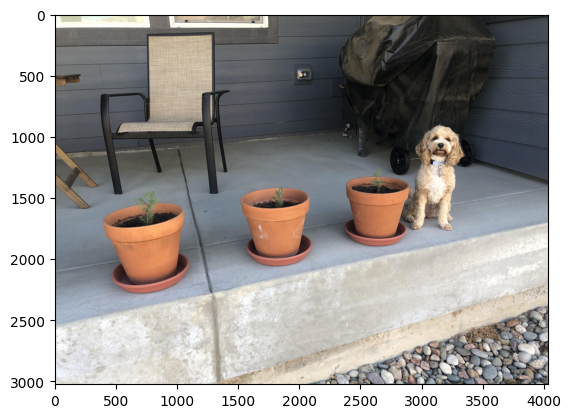

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

L'image doit être redimensionnée dans une dimensions divisable par 64.

In [ ]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640,
    pad_to_aspect_ratio=True,
    bounding_box_format="xywh"
)

In [ ]:
image_batch = inference_resizing([image])

La detection :

In [ ]:
y_pred = pretrained_model.predict(image_batch)
y_pred

1/1 [==============================] - 1s 566ms/step


{'boxes': array([[[449.5106  , 142.71709 ,  90.91397 , 141.12837 ],
         [374.74982 , 206.06047 ,  86.41052 ,  94.268814],
         [ 59.679276, 229.163   , 114.074295, 130.60635 ],
         [238.03307 , 223.13684 ,  95.846085, 102.32648 ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  

On utilise l'utilitaire Keras keras_cv.visualization.plot_bounding_box_gallery() pour afficher le nom correct des classes sur les images :

In [ ]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

Affichons maintenant le résultat :

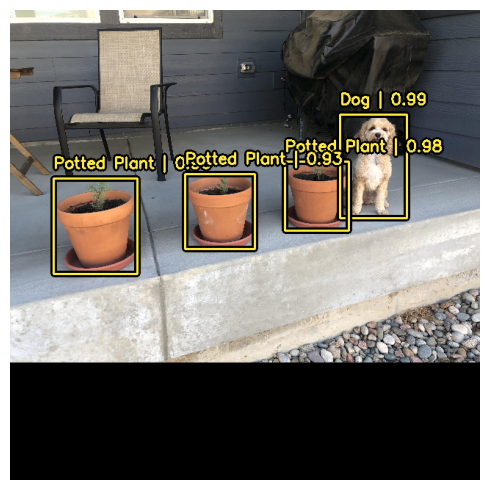

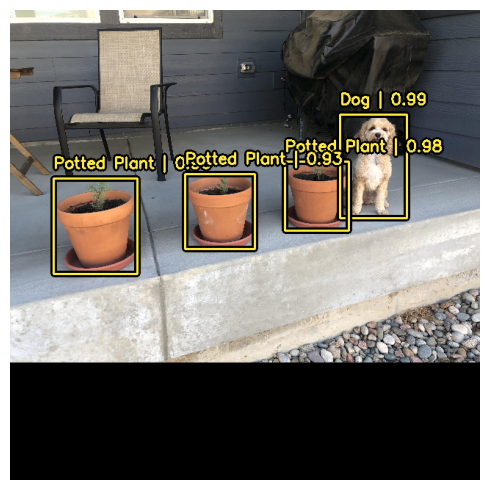

In [ ]:
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

Extraction des informations :

In [ ]:
y_pred

{'boxes': array([[[449.5106  , 142.71709 ,  90.91397 , 141.12837 ],
         [374.74982 , 206.06047 ,  86.41052 ,  94.268814],
         [ 59.679276, 229.163   , 114.074295, 130.60635 ],
         [238.03307 , 223.13684 ,  95.846085, 102.32648 ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  

In [ ]:
# Analyser les prédictions et dessiner les boîtes englobantes
def draw_boxes(image, predictions, confidence_threshold=0.5):
    height, width, _ = image.shape
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for prediction in predictions:
        if prediction['score'] > confidence_threshold:
            box = prediction['bounding_box']
            class_id = prediction['class_id']
            score = prediction['score']

            # Convertir les coordonnées de la boîte englobante
            x_min = int(box[0] * width)
            y_min = int(box[1] * height)
            x_max = int(box[2] * width)
            y_max = int(box[3] * height)

            # Dessiner la boîte et l'étiquette sur l'image
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            label = f"{model.classes[class_id]}: {score:.2f}"
            plt.text(x_min, y_min - 10, label, color='g', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

# Dessiner les boîtes sur l'image originale
original_image = plt.imread(filepath)
draw_boxes(original_image, y_pred)

In [ ]:




# Access the 'boxes' key directly from the 'y_pred' dictionary
boxes = y_pred['boxes']
# Print the boxes
# print(boxes)

classes = y_pred['classes']
# Print the classes
print(classes)

scores = y_pred['confidence']
# Print the scores
print(scores)

[[11 15 15 15 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]]
[[ 0.99133146  0.97528195  0.9600598   0.9280971  -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1

In [ ]:
class_mapping

{0: 'Aeroplane',
 1: 'Bicycle',
 2: 'Bird',
 3: 'Boat',
 4: 'Bottle',
 5: 'Bus',
 6: 'Car',
 7: 'Cat',
 8: 'Chair',
 9: 'Cow',
 10: 'Dining Table',
 11: 'Dog',
 12: 'Horse',
 13: 'Motorbike',
 14: 'Person',
 15: 'Potted Plant',
 16: 'Sheep',
 17: 'Sofa',
 18: 'Train',
 19: 'Tvmonitor',
 20: 'Total'}

In [ ]:
confidence_threshold=0.5
#class_mapping = dict(zip(range(len(class_ids)), class_ids))

#en cours :
#compte le nombre de detection par classes POUR LA PREMIERE IMAGE

#lit le tableau des scores et va lire le type dans classes

# Compter les occurrences de chaque classe (en ignorant les -1)
class_counts = {}
for cls in classes[0]:
    if cls != -1:
        if cls in class_counts:
            class_counts[cls] += 1
        else:
            class_counts[cls] = 1

# Mapper les indices aux noms des classes
class_names_counts = {class_mapping[cls]: count for cls, count in class_counts.items()}

# Afficher les résultats
for name, count in class_names_counts.items():
    print(f'Classe: {name}, Nombre d\'occurrences: {count}')

Classe: Dog, Nombre d'occurrences: 1
Classe: Potted Plant, Nombre d'occurrences: 3
